# Styling Plots

### Introduction

Whenever exposing your work to an external audience (like, say, the Kaggle userbase), styling your work is a must. The defaults in pandas (and other tools) are rarely exactly right for the message you want to communicate. Tweaking your plot can greatly enhance the communicative power of your visualizations, helping to make your work more impactful.

An important skill in plot styling is knowing how to look things up. Comments like "I have been using Matplotlib for a decade now, and I still have to look most things up" *are all too common*. 

If you're styling a seaborn plot, the library's [gallery](http://seaborn.pydata.org/examples/) and [API documentation](https://seaborn.pydata.org/api.html) are a great place to find styling options. 

And for both seaborn and pandas there is a wealth of information that you can find by looking up "how to do X with Y" on [StackOverflow](https://stackoverflow.com/) (replacing X with what you want to do, and Y with pandas or seaborn). If you want to change your plot in some way not covered in this brief tutorial, and don't already know what function you need to do it, searching like this is the most efficient way of finding it.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

reviews = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Kaggle/data visualization/winemag-data_first150k.csv", index_col = 0)

In [2]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Points on style

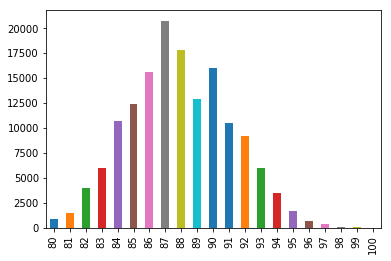

In [3]:
reviews['points'].value_counts().sort_index().plot.bar()

Throughout this section we're going to work on making this plot look nicer.

This plot is kind of hard to see. So make it bigger! We can use the **figsize** parameter to do that.

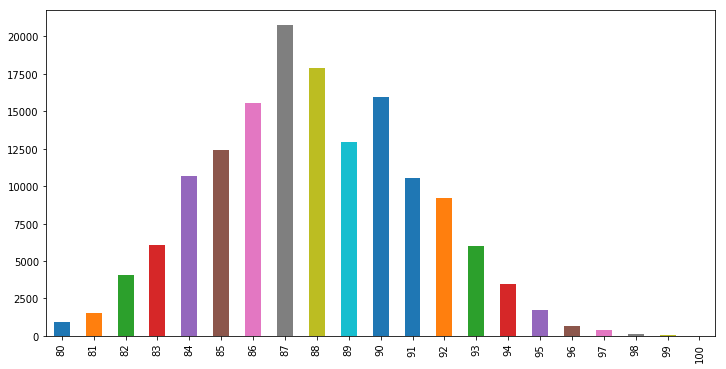

In [4]:
reviews['points'].value_counts().sort_index().plot.bar(figsize = (12, 6))

**figsize** controls the size of the image, in inches. It expects a tuple of **(width, height)** values.


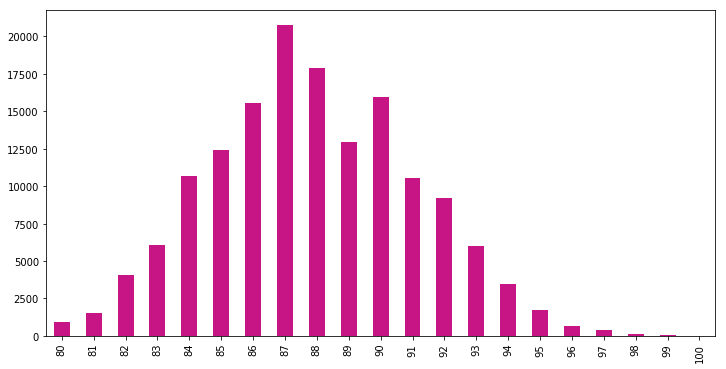

In [5]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (12, 6),
    color = 'mediumvioletred'
)

The text labels are very hard to read at this size. They fit the plot when our plot was very small, but now that the plot is much bigger we need much bigger labels. We can used **fontsize** to adjust this.

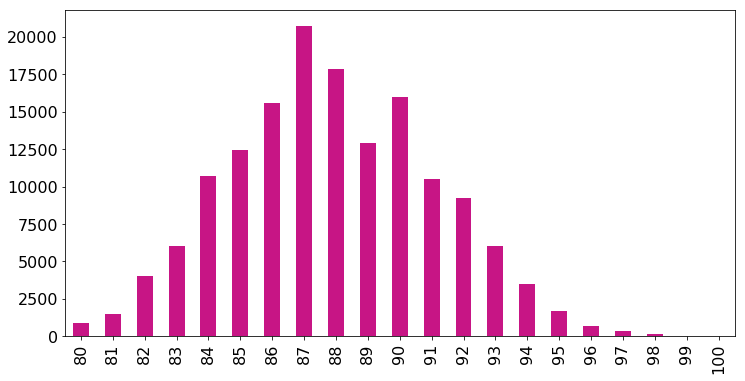

In [6]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (12, 6),
    color = 'mediumvioletred',
    fontsize = 16
)

We also need a title.

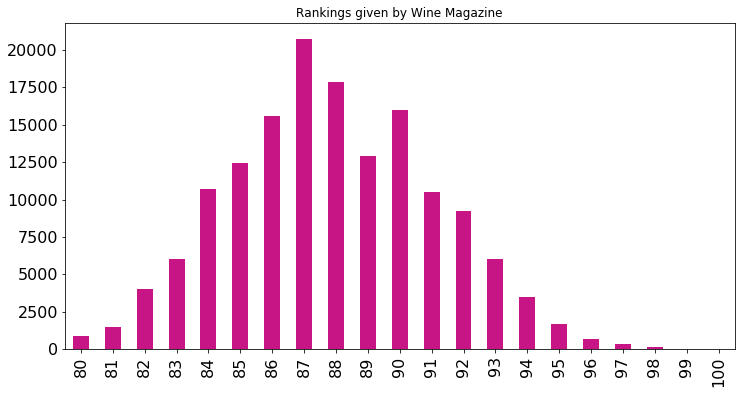

In [7]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (12, 6),
    color = 'mediumvioletred', 
    fontsize = 16,
    title = 'Rankings given by Wine Magazine'
)

However, this title is too small. Unfortunately, **pandas** doesn't give us an easy way of adjusting the title size.

Under the hood, **pandas** data visualization tools are built on top of another, lower-level graphics library called **matplotlib**. 

Anything that you build in **pandas** can be built using matplotlib directly. **pandas** merely makes it easier to get that work done.

**matplotlib** does provide a way of adjusting the title size. Let's go ahead and do it that way, and see what's different:

Text(0.5,1,'Ranking given by Wine Magazine')

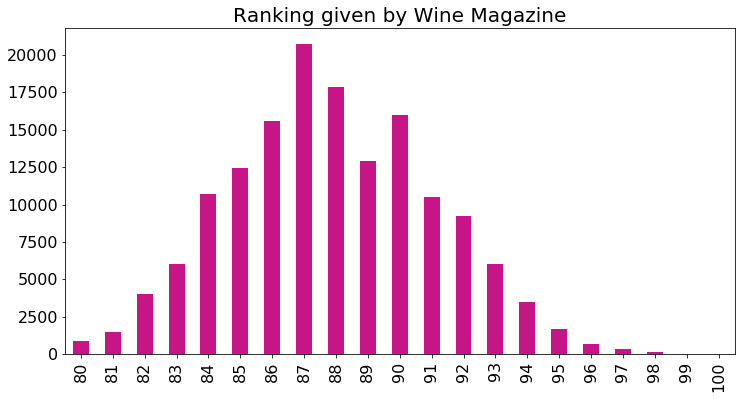

In [8]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (12, 6),
    color = 'mediumvioletred',
    fontsize = 16
)

ax.set_title("Ranking given by Wine Magazine", fontsize = 20)

In the cell immediately above, all we've done is grabbed that object, assigned it to the variable ax, and then called **set_title** on **ax**. The **ax.set_title** method makes it easy to change the fontsize; the **title=** keyword parameter in the pandas library does not.

**seaborn**, covered in a separate section of the tutorial, also uses **matplotlib** under the hood. This means that the tricks above work there too. 

**seaborn** has its own tricks, too—for example, we can use the very convenient **sns.despine** method to turn off the ugly black border.

In [9]:
import seaborn as sns

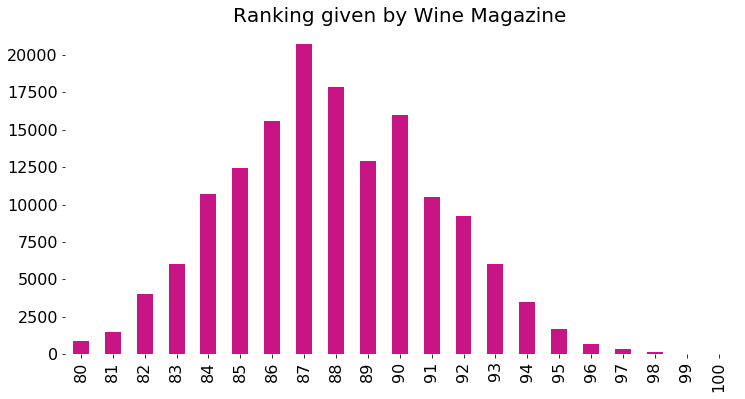

In [10]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (12, 6),
    color = 'mediumvioletred',
    fontsize = 16
)

ax.set_title("Ranking given by Wine Magazine", fontsize = 20)
sns.despine(bottom = True, left = True)

Prefect. This graph is more clearer than what we started with; it will do a much better job communicating the analysis to our readers.

There are many, many more things that you can do than just what we've shown here. Different plots provide different styling options: **color** is almost universal for example, while **s** (size) only makes sense in a scatterplot. For now, the operations we've shown here are enough to get you started.

## Exercise:

In [11]:
pokemon = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Kaggle/data visualization/Pokemon.csv")

In [12]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


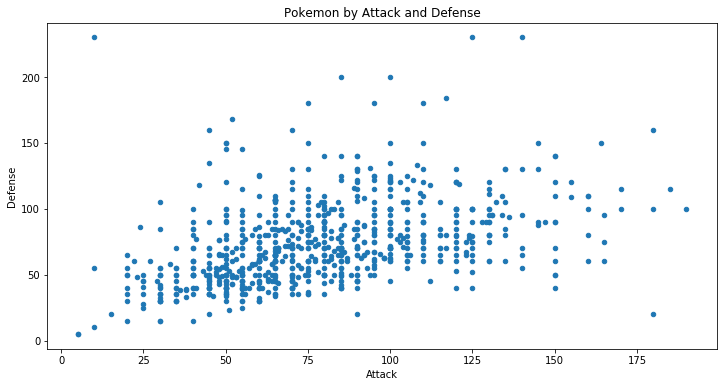

In [13]:
pokemon.plot.scatter(x = "Attack", y = "Defense",
                    figsize = (12, 6),
                    title = "Pokemon by Attack and Defense"
                    )

Text(0.5,1,'Pokemon by Stat Total')

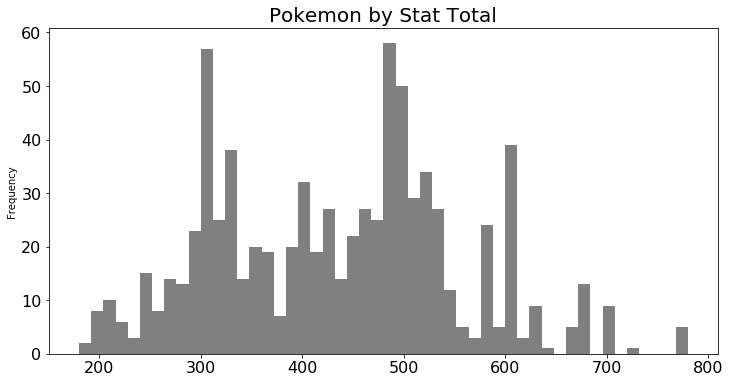

In [14]:
ax = pokemon['Total'].plot.hist(
    figsize = (12, 6),
    fontsize = 16,
    bins =  50,
    color = 'gray'
)

ax.set_title("Pokemon by Stat Total", fontsize = 20)

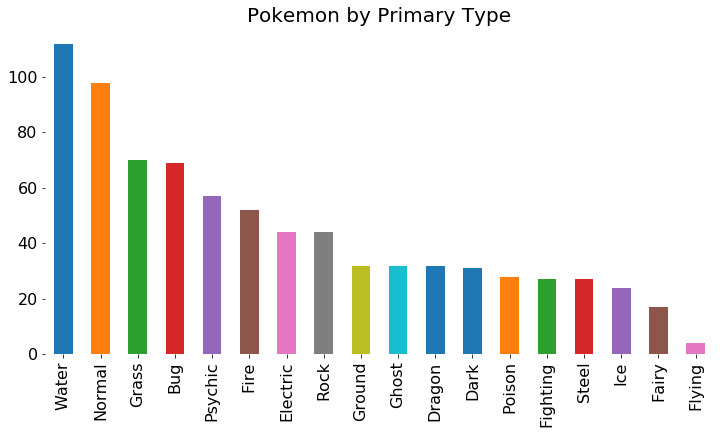

In [15]:
ax = pokemon['Type 1'].value_counts().plot.bar(
    figsize = (12, 6),
    fontsize = 16
)

ax.set_title("Pokemon by Primary Type", fontsize = 20)
sns.despine(bottom = True, left = True)

___
___
___


# Subplots

In [16]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Subplotting

It is a technique for creating multiple plots that live side-by-side in one oberall figure.
We can use the `subplots` method to create a figure with multiple subplots.

`subplots` takes two arguments. The first one controls the number of `rows`, the second one the nmber on `columns`.

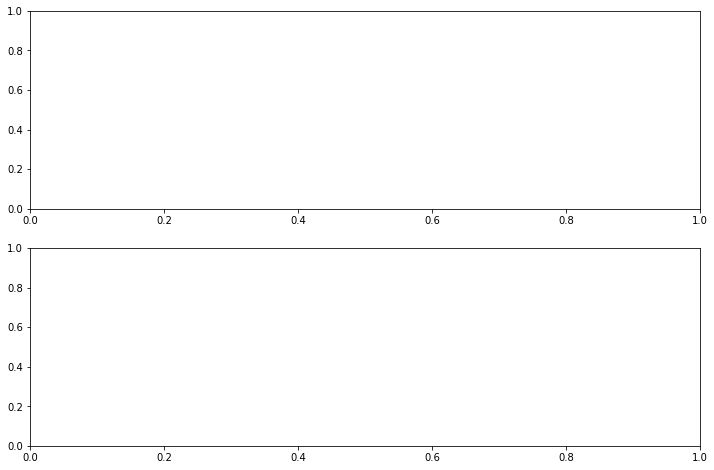

In [17]:
fig, axarr = plt.subplots(2, 1, figsize = (12, 8))

Since we asked for a `subplots(2, 1)`, we got a figure with two rows and one column.

Let's break this down a bit. When pandas generates a bar chart, behind the scenes here is what it actually does:

1. Generate a new matplotlib Figure object.

2. Create a new matplotlib AxesSubplot object, and assign it to the Figure.

3. Use AxesSubplot methods to draw the information on the screen.

4. Return the result to the user.

In a similar way, our `subplots` operation above created one overall Figure with two `AxesSubplots` vertically nested inside of it.

`subplots` returns two things, a figure (which we assigned to fig) and an array of the axes contained therein (which we assigned to `axarr`). Here are the axarr contents:

In [18]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10eb8ef28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10eb6e278>], dtype=object)

To tell `pandas` which subplot we want a new plot to go in—the first one or the second one—we need to grab the proper axis out of the list and pass it into `pandas` via the `ax` parameter:

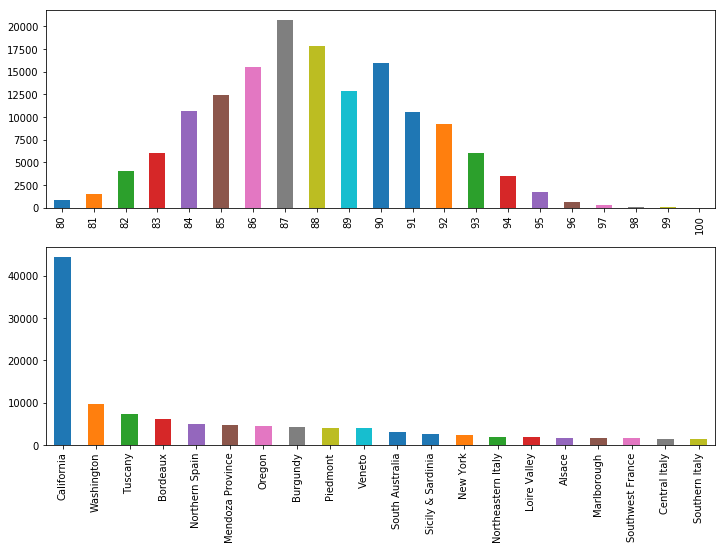

In [20]:
fig, axarr = plt.subplots(2, 1, figsize = (12, 8))

reviews['points'].value_counts().sort_index().plot.bar(ax = axarr[0])

reviews['province'].value_counts().head(20).plot.bar(ax = axarr[1])

We are of course not limited to having only a single row. We can create as many subplots as we want, in whatever configuration we need.

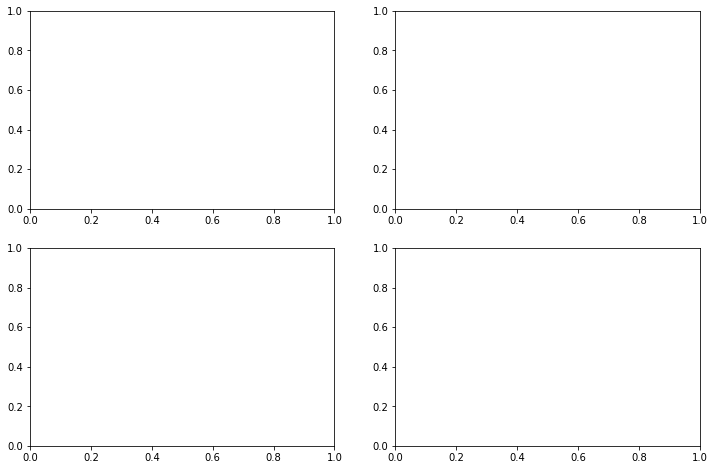

In [21]:
fig, axarr = plt.subplots(2, 2, figsize = (12, 8))

If there are multiple columns and multiple rows, as above, the axis array becoming a list of lists:

In [22]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eb5d080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1160fbb00>]], dtype=object)

This means to plot our data from earlier, we now need a row number, then a column number.

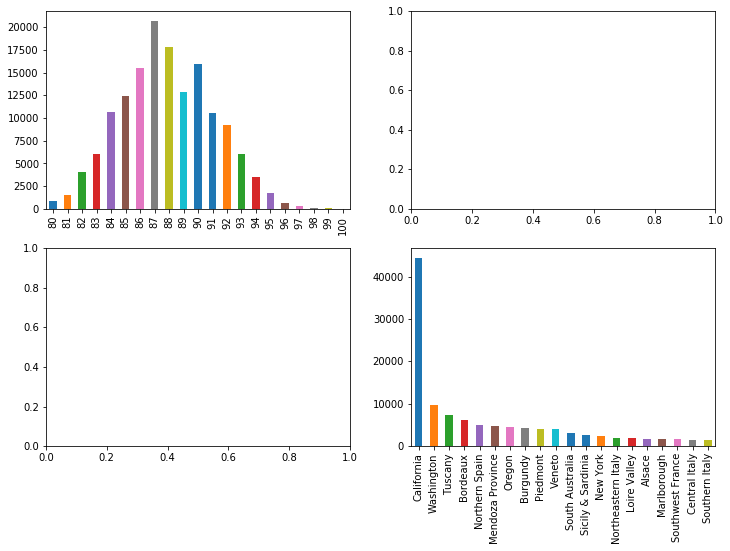

In [24]:
fig, axarr = plt.subplots(2, 2, figsize = (12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax = axarr[0][0] #first row and column
)

reviews['province'].value_counts().head(20).plot.bar(
    ax = axarr[1][1] #last
)

Notice that the bar plot of wines by point counts is in the first row and first column (the `[0][0]` position), while the bar plot of wines by origin is in the second row and second column (`[1][1]`).

By combining subplots with the styles we learned in the last section, we can create appealing-looking panel displays.

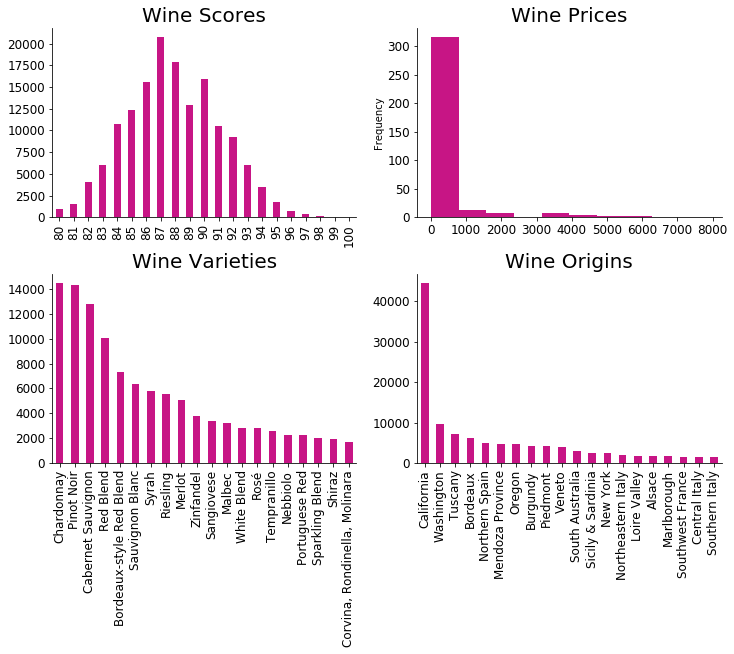

In [25]:
fig, axarr = plt.subplots(2, 2, figsize = (12, 8))

#for [0][0]
reviews['points'].value_counts().sort_index().plot.bar(
    ax = axarr[0][0], fontsize = 12, color = "mediumvioletred"
)
axarr[0][0].set_title("Wine Scores", fontsize = 20)


#for [0][1]
reviews['price'].value_counts().plot.hist(
    ax = axarr[0][1], fontsize = 12, color = "mediumvioletred"
)
axarr[0][1].set_title("Wine Prices", fontsize = 20)

#for [1][0]
reviews['variety'].value_counts().head(20).plot.bar(
    ax = axarr[1][0], fontsize = 12, color = "mediumvioletred"
)
axarr[1][0].set_title("Wine Varieties", fontsize = 20)

#for [1][1]
reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=20)

plt.subplots_adjust(hspace = 0.3)

import seaborn as sns
sns.despine()

# Why subplot

### Why are subplots useful??

Oftentimes as a part of the exploratory data visualization process you will find yourself creating a large number of smaller charts probing one or a few specific aspects of the data. For example, suppose we're interested in comparing the scores for relatively common wines with those for relatively rare ones. In these cases, it makes logical sense to combine the two plots we would produce into one visual "unit" for analysis and discussion.

When we combine subplots with the style attributes we explored in the previous notebook, this technique allows us to create extremely attractive and informative panel displays.

Finally, subplots are critically useful because they enable **faceting**. Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

The recommended way to perform faceting is to use the `seaborn` `FacetGrid` facility. This feature is explored in a separate section of this tutorial.

# Exercise

* A `matplotlib` plot consist of a single X composed of one or more Y. What makes X and Y?
> The plot consists of one overall figure composed of one or more axes.

* The subplots function takes two parameters as input?
> (number of rows, number of columns)

* The subplots function return what two variables?
> A figure and an array of axes.

In [26]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


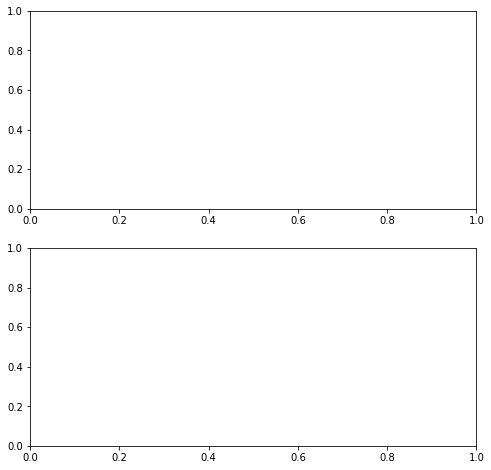

In [27]:
fig, axarr = plt.subplots(2, 1, figsize = (8, 8))

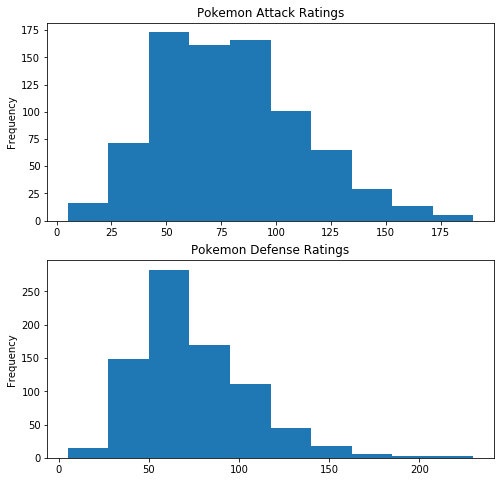

In [28]:
fig, axarr = plt.subplots(2, 1, figsize = (8, 8))

pokemon['Attack'].plot.hist(ax = axarr[0], title = "Pokemon Attack Ratings")

pokemon['Defense'].plot.hist(ax = axarr[1], title = "Pokemon Defense Ratings")